In [ ]:
!pip install tensorflow
!pip install matplotlib
!pip install numpy

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Create CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3380 - loss: 1.7946 - val_accuracy: 0.5226 - val_loss: 1.3786
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5579 - loss: 1.2512 - val_accuracy: 0.5651 - val_loss: 1.1973
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6181 - loss: 1.0811 - val_accuracy: 0.6247 - val_loss: 1.0646
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6576 - loss: 0.9723 - val_accuracy: 0.6603 - val_loss: 0.9851
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6887 - loss: 0.8849 - val_accuracy: 0.6442 - val_loss: 1.0093
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7171 - loss: 0.8149 - val_accuracy: 0.6921 - val_loss: 0.8862
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7421 - loss: 0.7443 - val_accuracy: 0.7024 - val_loss: 0.8597
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7517 - loss: 0.7116 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


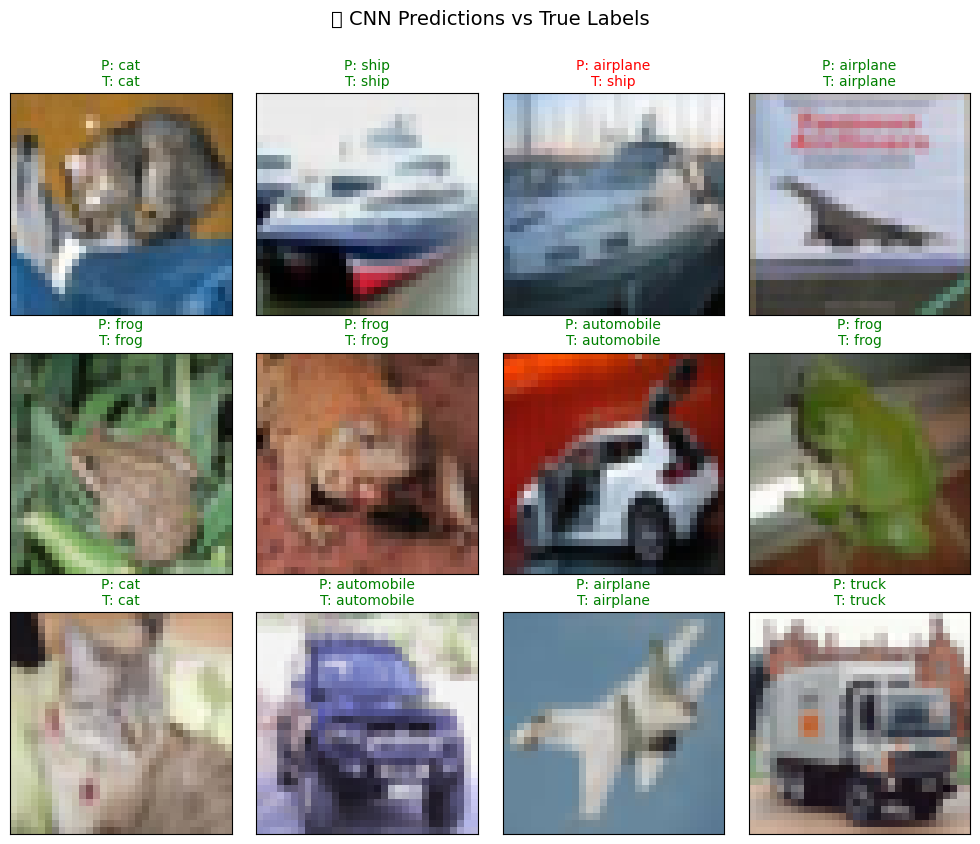

In [ ]:
# Predict on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Plot some images with predictions
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(x_test[i])
    true_label = class_names[y_test[i][0]]
    pred_label = class_names[y_pred[i]]
    color = 'green' if y_pred[i] == y_test[i] else 'red'
    plt.title(f"P: {pred_label}\nT: {true_label}", color=color, fontsize=10)
plt.tight_layout()
plt.suptitle("🔍 CNN Predictions vs True Labels", fontsize=14, y=1.05)
plt.show()